In [6]:
(asdf:load-system :imago/jupyter)
(asdf:load-system :array-operations)
(asdf:load-system :cl-watershed)

T

T

T

*IMAGE*

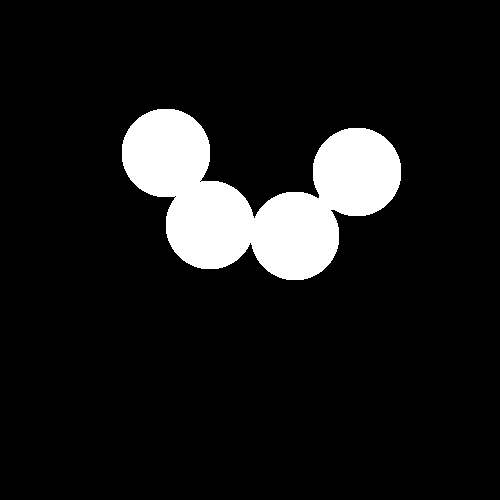

In [7]:
;; Read black&white image
(defparameter *image* (imago:read-image "~/.quicklisp/local-projects/cl-watershed/docs/disks.pbm"))
(imago-jupyter:show-image *image*)

NIL

*EDT*

*EDT*

*SEEDS*

4

*SEGMENTS*

*COLORS*

*IMAGE-SEGM*

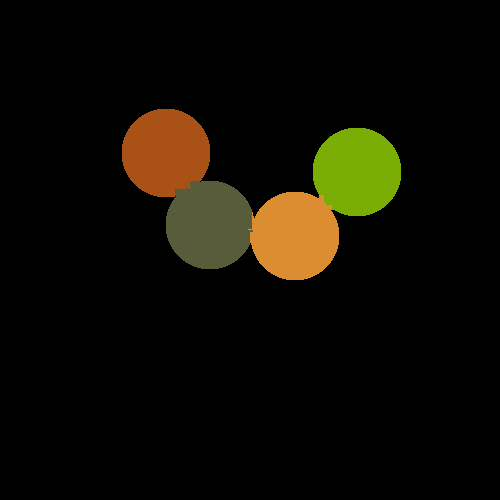

In [8]:
;; Invert the image
(imago:do-image-pixels
  (*image* color x y)
  (setf color (- 1 color)))

;; Calculate squared Euclidean distance transform
(defparameter *edt* (imago:distance-transform *image* :type :edt))

;; Negate the result
(defparameter *edt* (aops:vectorize* 'single-float (*edt*) (- *edt*)))

;; Create seeds
(defparameter *seeds* (aops:zeros* 'fixnum (array-dimensions *edt*)))
(setf (aref *seeds* 156 164) 1
      (aref *seeds* 219 201) 2
      (aref *seeds* 237 292) 3
      (aref *seeds* 172 365) 4)

;; Calculate segmentation
(defparameter *segments* (cl-watershed:watershed
                           *edt* *seeds*
                           (let ((pixels (imago:image-pixels *image*)))
                             (aops:vectorize* 'boolean (pixels) (zerop pixels)))))

;; Get random colors for segments and black for no label
(defparameter *colors*
  (cons (imago:make-color 0 0 0)
        (loop repeat 4 collect
              (imago:make-color (random 256)
                                (random 256)
                                (random 256)))))
;; Create segmnted image
(defparameter *image-segm*
  (make-instance 'imago:rgb-image
                 :pixels (aops:vectorize* 'imago:rgb-pixel (*segments*)
                                          (nth *segments* *colors*))))
(imago-jupyter:show-image *image-segm*)